# Image Convolution

In [12]:
import matplotlib.pyplot as plt
import numpy as np
nt = plt.imread('night.JPEG')

In [81]:
nt.shape

(359, 638, 3)

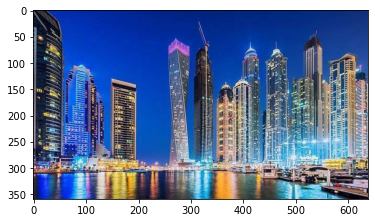

In [4]:
plt.imshow(nt)

In [6]:
# change the image from RGB to Gray
r, g, b = nt[:,:,0], nt[:,:,1], nt[:,:,2]
nt_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

In [10]:
nt_gray.shape, nt_gray

((359, 638),
 array([[ 77.9105,  80.9102,  22.1441, ...,  43.9915,  43.9915,  43.9915],
        [140.9042,  85.9097,  64.1399, ...,  43.9915,  43.9915,  43.9915],
        [136.9046, 125.1338,  76.6656, ...,  44.9914,  44.9914,  44.9914],
        ...,
        [ 40.1469,  37.7881,  35.7883, ...,   4.8964,   5.7931,   8.8036],
        [ 38.902 ,  36.9022,  35.1304, ...,   8.2812,   5.3524,   5.1244],
        [ 39.7709,  36.7712,  34.7714, ...,  22.725 ,  20.0242,  16.9105]]))

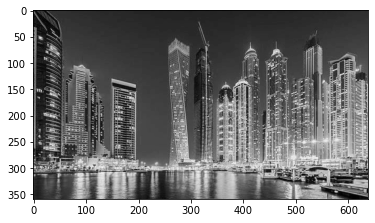

In [9]:
plt.imshow(nt_gray, cmap='gray')

In [31]:
# define the kernel to be convolved with the image
ker = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [32]:
# Now we do the convolution
import scipy
from scipy import signal
nt_convd = scipy.signal.convolve2d(nt_gray,ker,mode='same',boundary='symm')

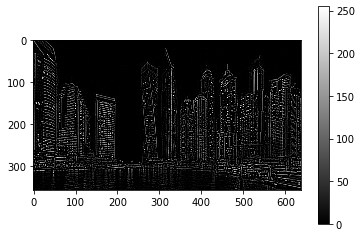

In [33]:
plt.imshow(nt_convd,cmap='gray',vmin=0, vmax=255)
plt.colorbar()

In [27]:
np.max(nt_convd), np.min(nt_convd)

(1793.8946999999998, -1279.0696000000003)

In [48]:
m, n = nt_gray.shape
nt_gray_padded = np.pad(nt_gray,((1,1),(1,1)))
nt_convd = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        ic = i+1
        jc = j+1
        nt_convd[i,j] = np.sum(nt_gray_padded[ic-1:ic+2,jc-1:jc+2]*ker)

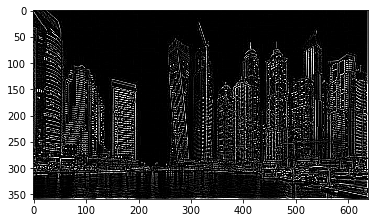

In [50]:
plt.imshow(nt_convd,cmap="gray",vmin=0, vmax=255)

In [75]:
ker_choices = {'Lap':np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
              'ave':np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9,
              'Dxx':np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),
              'Dyy':np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]),
              'grad':np.array([[-2, -1, 0], [-1, 2, -1], [0, -1, -2]])}

In [76]:
ker_choices.keys()

dict_keys(['Lap', 'ave', 'Dxx', 'Dyy', 'grad'])

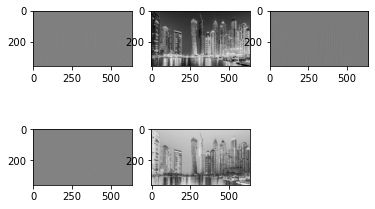

In [77]:
for i, key in enumerate(ker_choices.keys()):
    nt_convd = scipy.signal.convolve2d(nt_gray,ker_choices[key],mode='same',boundary='symm')
    plt.subplot(2,3,i+1)
    plt.imshow(nt_convd,cmap="gray")

In [78]:
nt_convd = scipy.signal.convolve2d(nt_gray,ker_choices['grad'],mode='same',boundary='symm')

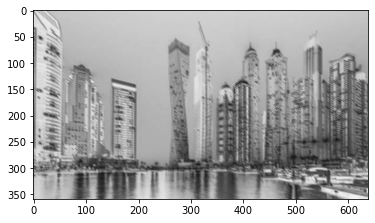

In [79]:
plt.imshow(nt_convd,cmap="gray")

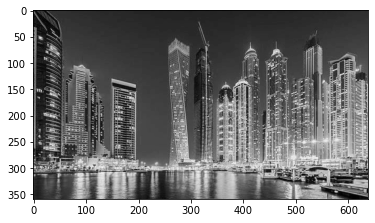

In [74]:
plt.imshow(nt_gray,cmap="gray")